In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import ImageGrid

In [4]:
def visualize_mcmc_approx_and_mean(ref_image_name, mask_name, missing_index, n, figname):

    mask = np.load(("data/25_by_25/" + str(ref_image_name) + "/" + str(mask_name) + "/" + "mask.npy"))
    missing_indices = np.squeeze(np.argwhere((1-mask).reshape((n**2,))))
    matrix_missing_indices = np.argwhere((1-mask))
    ref_image = np.log(np.load(("data/25_by_25/" + str(ref_image_name) + "/ref_image.npy")))
    mcmc_samples = np.load(("data/25_by_25/" + str(ref_image_name) + "/" + str(mask_name) + "/"
                            + "/condsim_range_1.6_smooth_1.6_1000_missing_index_" +
                            str(missing_index) + ".npy"))
    mcmc_samples = np.log(mcmc_samples)
    print(ref_image[:,missing_indices])

    fig = plt.figure(figsize=(10, 7.2))

    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                    nrows_ncols=(2,2),
                    axes_pad=0.35,
                    share_all=False,
                    cbar_location="right",
                    cbar_mode="single",
                    cbar_size="7%",
                    cbar_pad=0.15,
                    label_mode = "L"
                    )
    
    for i, ax in enumerate(grid):
        if(i == 0):

            im = ax.imshow(ref_image.reshape((n,n)),
                 vmin = -2, vmax = 4)
            rect = Rectangle(((matrix_missing_indices[0,1]-.35), (matrix_missing_indices[0,0]-.35)), width=1, height=1,
                             facecolor='none', edgecolor='r')
            ax.add_patch(rect)
            ax.set_title("True")
        
        elif(i == 1):
            mcmc_image = ref_image.reshape((n**2))
            mcmc_image[missing_indices] = mcmc_samples[0]
            ax.imshow(mcmc_image.reshape((n,n)), vmin = -2, vmax = 4)
            rect = Rectangle(((matrix_missing_indices[0,1]-.35), (matrix_missing_indices[0,0]-.35)), width=1, height=1,
                             facecolor='none', edgecolor='r')
            ax.add_patch(rect)
            ax.set_title("MCMC Approx")
        elif(i == 2):
            mcmc_image = ref_image.reshape((n**2))
            mcmc_image[missing_indices] = mcmc_samples[1]
            ax.imshow(mcmc_image.reshape((n,n)), vmin = -2, vmax = 4)
            rect = Rectangle(((matrix_missing_indices[0,1]-.35), (matrix_missing_indices[0,0]-.35)), width=1, height=1,
                             facecolor='none', edgecolor='r')
            ax.add_patch(rect)
            ax.set_title("MCMC Approx")

        elif(i == 3):
            mcmc_image = ref_image.reshape((n**2))
            mcmc_mean = np.mean(mcmc_samples)
            print(mcmc_mean)
            mcmc_image[missing_indices] = mcmc_mean
            ax.imshow(mcmc_image.reshape((n,n)), vmin = -2, vmax = 4)
            rect = Rectangle(((matrix_missing_indices[0,1]-.35), (matrix_missing_indices[0,0]-.35)), width=1, height=1,
                             facecolor='none', edgecolor='r')
            ax.add_patch(rect)
            ax.set_title("MCMC Conditional Mean")
    
    cbar = grid.cbar_axes[0].colorbar(im)
    plt.tight_layout()
    plt.savefig(figname)

[0.62585868]
0.9877188985939198


/tmp/ipykernel_4169/3933620727.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


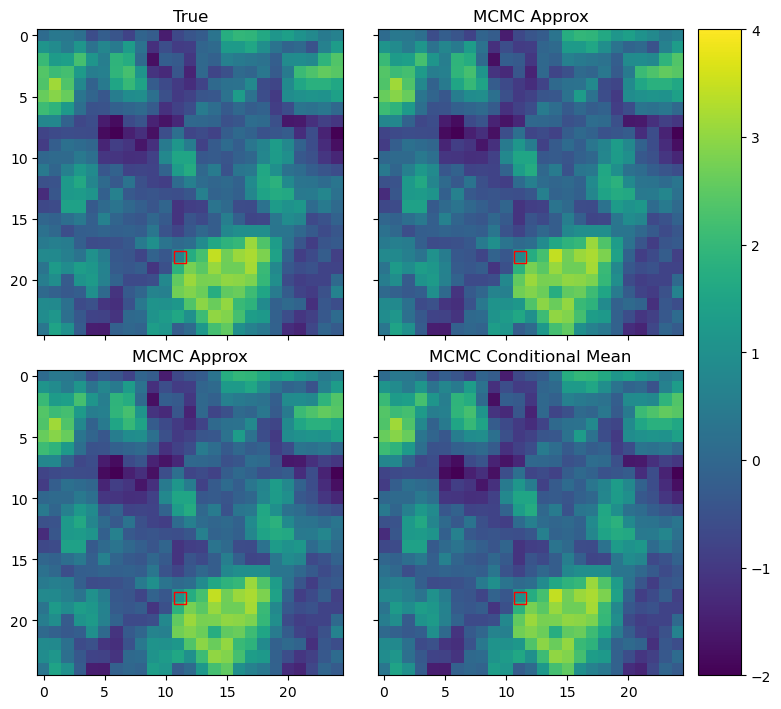

In [25]:
ref_image_name = "ref_image1"
mask_name = "mask7"
missing_index = 1
n = 25
figname = ("data/25_by_25/" + ref_image_name + "/" + mask_name + 
           "/mcmc_approx_mean_missing_index_" + str(missing_index) + ".png")
visualize_mcmc_approx_and_mean(ref_image_name, mask_name, missing_index, n, figname)

In [5]:
def visualize_mcmc_marginal_density(ref_image_name, mask_name, missing_index, n, figname):

    mask = np.load(("data/25_by_25/" + str(ref_image_name) + "/" + str(mask_name) + "/" + "mask.npy"))
    missing_indices = np.squeeze(np.argwhere((1-mask).reshape((n**2,))))
    matrix_missing_indices = np.argwhere((1-mask))
    ref_image = np.log(np.load(("data/25_by_25/" + str(ref_image_name) + "/ref_image.npy")))
    mcmc_samples = np.load(("data/25_by_25/" + str(ref_image_name) + "/" + str(mask_name) + "/"
                            + "/condsim_range_1.6_smooth_1.6_1000_missing_index_" +
                            str(missing_index) + ".npy"))

    fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (10,5))

    ax[0].imshow(ref_image.reshape((n,n)), alpha = mask.reshape((n,n)).astype(float),
                 vmin = -2, vmax = 4)
    
    pdd = pd.DataFrame(np.log(mcmc_samples), columns = None)
    sns.kdeplot(data = pdd, palette=['blue'], ax = ax[1])
    ax[1].axvline(ref_image[:,missing_indices], color='red', linestyle = 'dashed')
    ax[1].legend(labels = ['MCMC'])
    plt.savefig(figname)



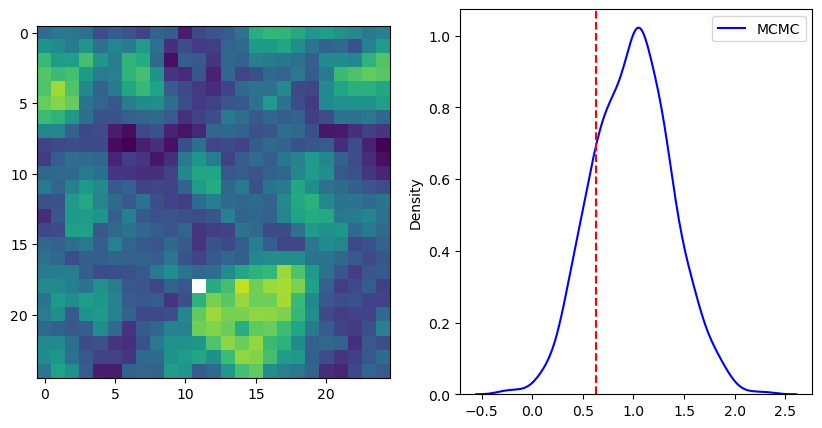

In [27]:
figname = ("data/25_by_25/" + ref_image_name + "/" + mask_name + 
           "/mcmc_marginal_density_missing_index_" + str(missing_index) + ".png")
visualize_mcmc_marginal_density(ref_image_name, mask_name, missing_index, n, figname)

In [6]:
def visualize_mcmc_approx_and_mean_multi(ref_image_name, mask_name, missing_index, n, figname):

    mask = np.load(("data/25_by_25/" + str(ref_image_name) + "/" + str(mask_name) + "/" + "mask.npy"))
    missing_indices = np.squeeze(np.argwhere((1-mask).reshape((n**2,))))
    matrix_missing_index = (int(missing_indices[(missing_index-1)] % n), int(missing_indices[(missing_index-1)] / n))
    ref_image = np.log(np.load(("data/25_by_25/" + str(ref_image_name) + "/ref_image.npy")))
    mcmc_samples = np.load(("data/25_by_25/" + str(ref_image_name) + "/" + str(mask_name) + "/"
                            + "condsim_range_1.6_smooth_1.6_1000_missing_index_" +
                            str(missing_index) + ".npy"))
    mcmc_samples = np.log(mcmc_samples)
    print(matrix_missing_index)
    #print(ref_image[:,missing_indices[missing_index]])

    fig = plt.figure(figsize=(10, 7.2))

    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                    nrows_ncols=(2,2),
                    axes_pad=0.35,
                    share_all=False,
                    cbar_location="right",
                    cbar_mode="single",
                    cbar_size="7%",
                    cbar_pad=0.15,
                    label_mode = "L"
                    )
    
    for i, ax in enumerate(grid):
        if(i == 0):
            mask[matrix_missing_index[1],matrix_missing_index[0]] = 1
            im = ax.imshow(ref_image.reshape((n,n)), alpha = (mask.astype(float)).reshape((n,n)),
                 vmin = -2, vmax = 4)
            rect = Rectangle(((matrix_missing_index[0]-.35), (matrix_missing_index[1]-.35)), width=1, height=1,
                             facecolor='none', edgecolor='r')
            ax.add_patch(rect)
            ax.set_title("True")
        
        elif(i == 1):
            mcmc_image = ref_image.reshape((n**2))
            mcmc_image[missing_indices[(missing_index-1)]] = mcmc_samples[0]
            mask = mask.reshape((n,n))
            mask[matrix_missing_index[1],matrix_missing_index[0]] = 1
            ax.imshow(mcmc_image.reshape((n,n)), alpha = (mask.astype(float)).reshape((n,n)), vmin = -2, vmax = 4)
            rect = Rectangle(((matrix_missing_index[0]-.35), (matrix_missing_index[1]-.35)), width=1, height=1,
                             facecolor='none', edgecolor='r')
            ax.add_patch(rect)
            ax.set_title("MCMC Approx")
        elif(i == 2):
            mcmc_image = ref_image.reshape((n**2))
            mcmc_image[missing_indices[(missing_index-1)]] = mcmc_samples[1]
            mask = mask.reshape((n,n))
            mask[matrix_missing_index[1],matrix_missing_index[0]] = 1
            ax.imshow(mcmc_image.reshape((n,n)), alpha = (mask.astype(float)).reshape((n,n)), vmin = -2, vmax = 4)
            rect = Rectangle(((matrix_missing_index[0]-.35), (matrix_missing_index[1]-.35)), width=1, height=1,
                             facecolor='none', edgecolor='r')
            ax.add_patch(rect)
            ax.set_title("MCMC Approx")

        elif(i == 3):
            mcmc_image = ref_image.reshape((n**2))
            mcmc_mean = np.mean(mcmc_samples)
            print(mcmc_mean)
            mcmc_image[missing_indices[(missing_index-1)]] = mcmc_mean
            ax.imshow(mcmc_image.reshape((n,n)), alpha = (mask.astype(float)).reshape((n,n)), vmin = -2, vmax = 4)
            rect = Rectangle(((matrix_missing_index[0]-.35), (matrix_missing_index[1]-.35)), width=1, height=1,
                             facecolor='none', edgecolor='r')
            ax.add_patch(rect)
            ax.set_title("MCMC Conditional Mean")
    
    cbar = grid.cbar_axes[0].colorbar(im)
    plt.tight_layout()
    plt.savefig(figname)

(13, 17)
0.25659301638432347


/tmp/ipykernel_6944/1031342369.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


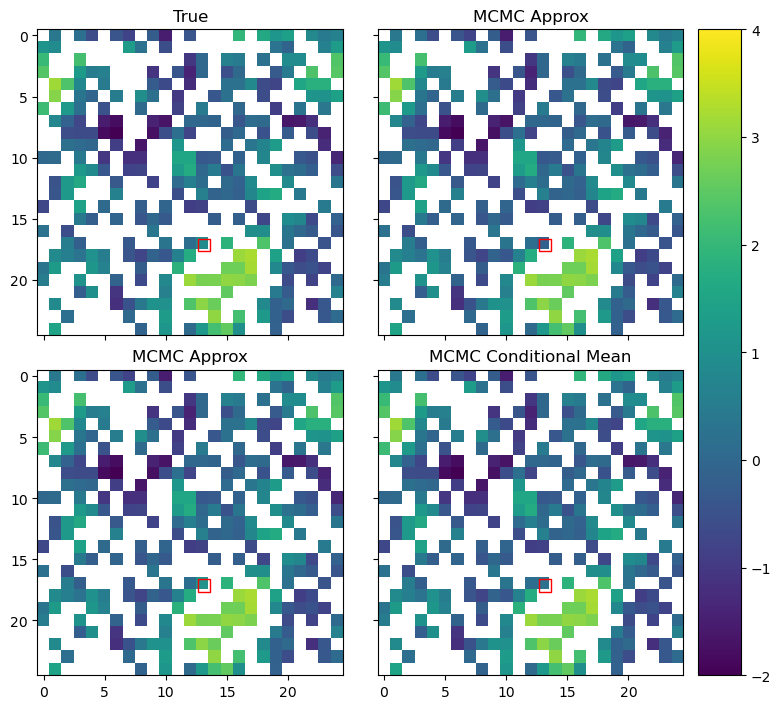

In [64]:
ref_image_name = "ref_image1"
mask_name = "mask9"
missing_index = 225
n = 25
figname = ("data/25_by_25/" + ref_image_name + "/" + mask_name + 
           "/mcmc_approx_mean_missing_index_" + str(missing_index) + ".png")
visualize_mcmc_approx_and_mean_multi(ref_image_name, mask_name, missing_index, n, figname)

In [52]:
def visualize_mcmc_marginal_density_multi(ref_image_name, mask_name, missing_index, n, figname):

    mask = np.load(("data/25_by_25/" + str(ref_image_name) + "/" + str(mask_name) + "/" + "mask.npy"))
    missing_indices = np.squeeze(np.argwhere((1-mask).reshape((n**2,))))
    matrix_missing_index = (int(missing_indices[(missing_index-1)] % n), int(missing_indices[(missing_index-1)] / n))
    ref_image = np.log(np.load(("data/25_by_25/" + str(ref_image_name) + "/ref_image.npy")))
    mcmc_samples = np.load(("data/25_by_25/" + str(ref_image_name) + "/" + str(mask_name) + "/"
                            + "/condsim_range_1.6_smooth_1.6_1000_missing_index_" +
                            str(missing_index) + ".npy"))

    fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (10,5))

    ax[0].imshow(ref_image.reshape((n,n)), alpha = mask.reshape((n,n)).astype(float),
                 vmin = -2, vmax = 4)
    rect = Rectangle(((matrix_missing_index[0]-.35), (matrix_missing_index[1]-.35)), width=1, height=1,
                             facecolor='none', edgecolor='r')
    ax[0].add_patch(rect)
    pdd = pd.DataFrame(np.log(mcmc_samples), columns = None)
    sns.kdeplot(data = pdd, palette=['blue'], ax = ax[1])
    ax[1].axvline(ref_image[:,missing_indices[(missing_index-1)]], color='red', linestyle = 'dashed')
    ax[1].legend(labels = ['MCMC'])
    plt.savefig(figname)

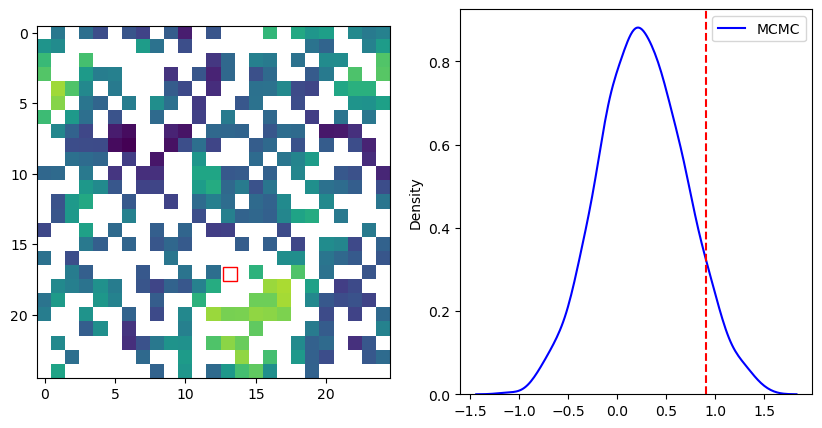

In [65]:
figname = ("data/25_by_25/" + ref_image_name + "/" + mask_name + 
           "/mcmc_marginal_density_missing_index_" + str(missing_index) + ".png")
visualize_mcmc_marginal_density_multi(ref_image_name, mask_name, missing_index, n, figname)